In [4]:
import matplotlib.pyplot as plt
import numpy as np
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma=0.9

In [5]:
# Make sure env is declared 
def return_prob(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        if y==A[i][1]:
            return A[i][0]
    # If y is not part of the Range, print 0
    return 0
def return_reward(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        
        if y==A[i][1]:
            return A[i][2]
    
    # If y isn't part of the range
    return 0
      

In [6]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
V_global=[]
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [7]:
def norm_diff(V1,V2):
    A=np.sum(np.fabs(V1- V2))
    return A

def ValueIteration(env,gamma):
    global V_global
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    
    V=np.zeros(16)
    V_old=np.zeros(16)
    Policy =np.random.randint(0,3,16)
    while True: #Make it true
        V_old=np.copy(V)
        for x in range(env.nS):
            tmax=0.0
            ta=0
            for a in range(env.nA):
                tsum=0.0
                for y in range(env.nS):
                    tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
                if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                    tmax=tsum
                    ta=a
                if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                    ta=a
                    tmax=tsum
                tsum=0.0
            Policy[x]=ta
            V[x] = tmax # Assign the maximum Value to the Value Function
        Plt_list.append(norm_diff(V_old,V))
        plt.plot(Plt_list, 'ro')
        if norm_diff(V_old,V) < delta:
            print(Policy)
            fancy_visual(V,Policy)
            V_global=V
            return Policy
        
    # By now, I have old Value Function - V1 and new Value Function V
    
    
    
    # For Plotting
    

In [29]:
def UpdatePolicy(V_old, P_old):
    Policy=np.zeros(env.nS)
    for x in range(env.nS):
        tmax=0.0
        ta=0
        for a in range(env.nA):
            tsum=0.0
            for y in range(env.nS):
                tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
            if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                tmax=tsum
                ta=a

            if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                ta=a
                tmax=tsum
            tsum=0.0
        Policy[x]=ta
    print("----")
    print("Old Policy :", P_old)
    print("New Policy :", Policy)
    print("----")
    
    if np.array_equal(P_old,Policy):
        boo=True
    else:
        boo=False
    return boo, Policy
            #V[x] = tmax # Assign the maximum Value to the Value Function 

In [38]:
#Beginning of While Loop
def PolicyIteration(env, gamma):
    V_k=np.zeros(16)
    V_k1=np.zeros(16)
    V=np.zeros(16)
    V_old=np.copy(V)
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    PIPolicy=np.random.randint(0,env.nA,env.nS)
    #print(PIPolicy)
    tsum=0
    while True:
        for x in range(env.nS):
            a=PIPolicy[x]
            for y in range(env.nS):
                tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
            V[x] = tsum
            tsum=0.0
        #print(V)
        boo = False
        print("Norm", norm_diff(V_old,V))
        if norm_diff(V_old,V) < delta:
            V_k1=V
            Plt_list.append(norm_diff(V_k1,V_k))
            V_k=V_k1
            print( "New", V)
            V_old=V
            boo, PIPolicy=UpdatePolicy(V, PIPolicy)
            
        else:
            V_old=V
        if boo:
            plt.plot(Plt_list, 'ro')
            print(Plt_list)
            return PIPolicy, V

Norm 0.3333333333333333
Norm 0.0
New [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1        0.
 0.         0.1        0.46333333 0.        ]
----
Old Policy : [1 0 3 0 0 3 0 1 2 3 1 0 1 2 1 2]
New Policy : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
----
Norm 0.0
New [0.         0.         0.         0.         0.         0.
 0.03       0.         0.         0.06       0.166      0.
 0.         0.169      0.52303333 0.        ]
----
Old Policy : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
New Policy : [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0.]
----
Norm 0.0
New [0.         0.         0.009      0.0027     0.         0.
 0.0525     0.         0.018      0.1059     0.20443    0.
 0.         0.23938    0.56205733 0.        ]
----
Old Policy : [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0.]
New Policy : [0. 1. 2. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 1. 0.]
----
Norm 0.0
New [0.         0.0027     0.01926    0.0065

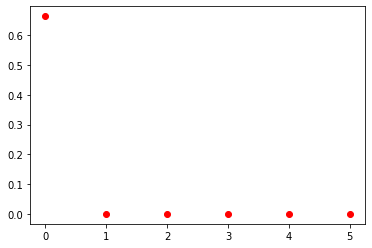

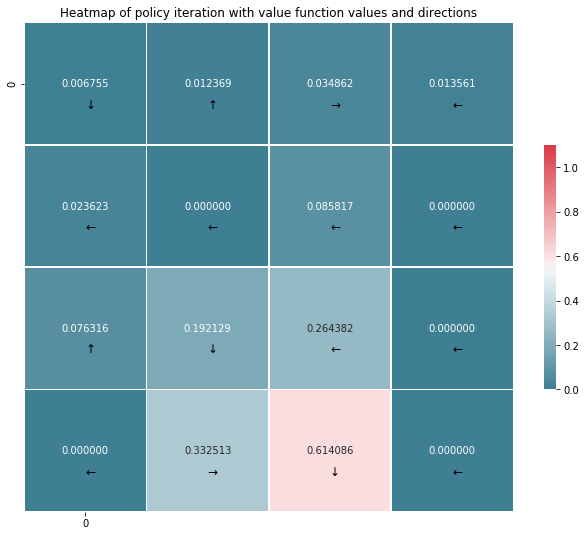

In [40]:
env.reset()
A,V_global=PolicyIteration(env,gamma)
fancy_visual(V_global,A)

In [41]:
Q=np.zeros((env.nS,env.nA))


for x in range(env.nS):
    tmax=0.0
    ta=0
    for a in range(env.nA):
        tsum=0.0
        for y in range(env.nS):
            tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_global[y])
#             if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
#                 tmax=tsum
#                 ta=a
#             if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
#                 ta=a
#                 tmax=tsum
        Q[x][a] = tsum
        tsum=0.0
        #Policy[x]=ta
        
print("Optimal Q Function", Q)

Optimal Q Function [[0.00911363 0.01282432 0.01282432 0.00573731]
 [0.00573731 0.01248516 0.01416924 0.01619586]
 [0.03991437 0.0335242  0.04027205 0.01823761]
 [0.01452692 0.01452692 0.00406837 0.01452692]
 [0.03200841 0.02998179 0.0249214  0.00911363]
 [0.         0.         0.         0.        ]
 [0.08977324 0.0793147  0.08977324 0.01045854]
 [0.         0.         0.         0.        ]
 [0.02998179 0.08053339 0.06472563 0.0876204 ]
 [0.12264854 0.20196324 0.17906846 0.10220947]
 [0.26760945 0.24186432 0.20997084 0.08338374]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.15739238 0.28397947 0.34161808 0.24186432]
 [0.36329417 0.6173128  0.59687373 0.5124018 ]
 [0.         0.         0.         0.        ]]
